<a href="https://colab.research.google.com/github/tianqwang/Deep-Learning/blob/master/Deep_Learning_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
! pip install fastai

    100% |████████████████████████████████| 112kB 5.9MB/s 
    100% |████████████████████████████████| 9.0MB 3.9MB/s 
    100% |████████████████████████████████| 61kB 21.0MB/s 
    100% |████████████████████████████████| 1.0MB 19.4MB/s 
    100% |████████████████████████████████| 112kB 28.2MB/s 
    100% |████████████████████████████████| 112kB 28.5MB/s 
    100% |████████████████████████████████| 2.2MB 13.9MB/s 
  Running setup.py bdist_wheel for prometheus-client ... - \ done
  Stored in directory: /root/.cache/pip/wheels/b9/96/bc/e2acadc6bbfe57a1f631a34ca4ce6dd057af059b8d6878202b
Successfully built prometheus-client
google-colab 0.0.1a1 has requirement notebook~=5.2.0, but you'll have notebook 5.7.0 which is incompatible.
jupyter-console 6.0.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.15 which is incompatible.
torchvision-nightly 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing instal

In [0]:
from fastai import *
from fastai.vision import *

In [6]:
path = untar_data(URLs.PETS); path


PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [7]:
path.ls()


[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'


In [10]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_170.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_25.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_119.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/havanese_106.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_207.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [34]:
bs = 16
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs, num_workers=2)
data.normalize(imagenet_stats)

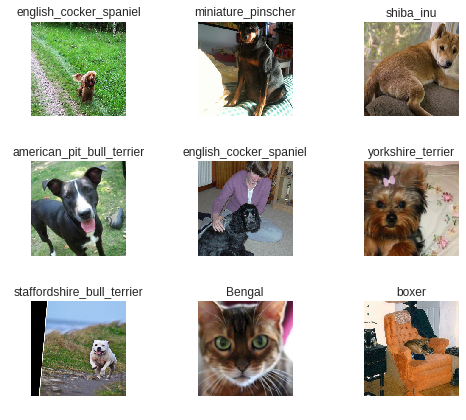

In [35]:
data.show_batch(rows=3, figsize=(7,6))


In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)


In [0]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate


In [23]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   11G  330G   4% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G  8.0K  6.4G   1% /var/colab
/dev/sda1       365G   13G  353G   4% /opt/bin
shm              64M   37M   28M  58% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [25]:
! --shm-size 8G

/bin/bash: --shm-size: command not found


In [0]:
doc(ImageDataBunch)